In [88]:
# Standard libraries
import numpy as np
import pandas as pd
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
# Functions created
from kcc_functions import *
# Plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Datetime libraries
import datetime as dt

## 0. Importing dataset and general settings

In [89]:
# Reading csv
df_locations = pd.read_csv('KCC_Analytical_Assessment_Data.csv')
df_locations.columns

Index(['LocationID', 'Portfolio', 'State', 'County', 'PostalCode',
       'Building Value', 'Other Value', 'Contents Value', 'Time Element Value',
       'Occupancy Code', 'Construction Code', 'Stories', 'Year Built', 'AAL'],
      dtype='object')

### Fromatting columns and assigning index col

In [90]:
# Converte column name in lowercase and remove any spaces
df_locations.columns = [x.lower().strip().replace(' ', '_') for x in df_locations.columns]
df_locations.rename(columns = {'locationid': 'id'}, inplace=True)
df_locations.set_index('id', inplace=True)
df_locations.head()

,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal
id,,,,,,,,,,,,,
1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312
2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944
3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,5+,2002.0,11014.10496
4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112
5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000


## 1. Exploratory data analysis and data cleaning

### Creating Risk Count variable

Assumed to be 1 for all locations

In [91]:
df_locations['risk_count'] = 1

### Statistical summary

summary_stats function was created to display a summary of the most important features of our variables

In [92]:
summary_stats(df_locations, 'Summary of statistics')

                                                 Summary of statistics                                                  


,count,mean,std,min,25%,50%,75%,max,Missing vals,# missing,Variable type
aal,49268.0,17461.41,11651.72,773.53,9712.76,14474.73,21749.70,99533.71,False,0,float64
building_value,49268.0,2241552.30,2706162.58,50000.00,470555.25,927804.00,2985167.75,9999611.00,False,0,int64
construction_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
contents_value,49268.0,1330657.45,1257240.06,10131.00,430911.00,841083.00,1787279.25,4999454.00,False,0,int64
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
occupancy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
other_value,49268.0,51249.96,28800.22,0.00,27473.00,51827.00,76056.75,99994.00,False,0,int64
portfolio,49268.0,1.50,0.50,1.00,1.00,2.00,2.00,2.00,False,0,int64
postalcode,49268.0,42265.10,27071.25,501.00,14850.00,45745.00,62675.00,88595.00,False,0,int64
risk_count,49268.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,False,0,int64


### Data types
In terms of data types, most of the variable make logical sense. The only case where there is an issue is with the stories column. It is something to keep in mind during the data cleaning process.

### Handling missing values

Stories and year built are the only variables that contain any missing values, with 2 and one cases respectively

**Stories missing values**

Since the min value of stories is 1, it is possible that missing values represent that there have been no stories. Missing values will be replaces with a 0. 

In [93]:
df_locations['stories'] = df_locations['stories'].fillna('0')

**year_built**

This value is harder to fill, as we could use a bunch of different methods to estimate the age of the building based on the rest of the variables. For now we will just ignore it and replace it with a generic 2000, since it is only one observation, and store it in a variable called missing_year and see if we can fill it later in the analysis. id 8343

In [95]:
df_locations['year_built'] = df_locations['year_built'].fillna(2000)

### Individual variables analysis

**portfolio**
Balanced portfolio

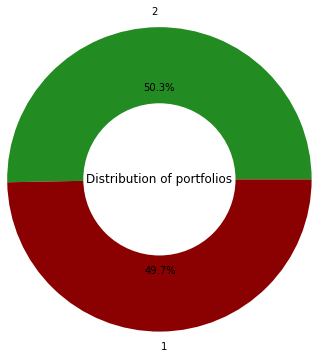

In [96]:
df_locations['portfolio'].unique()

plot_piechart(df_locations, 'portfolio', colors=['forestgreen', 'darkred'])

**state**

Number of states: 10
['CO', 'NY', 'PA', 'TX', 'OH', 'MA', 'MI', 'WI', 'NJ', 'IL']


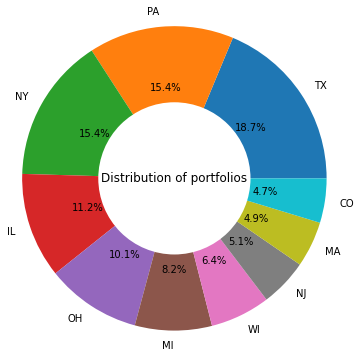

In [97]:
# Analyzing number of states
print('Number of states:', len(df_locations['state'].unique()))
print([x for x in df_locations['state'].unique()])
plot_piechart(df_locations, 'state')

**county**

647 different counties

In [98]:
len(df_locations['county'].unique())

647

**insured values**

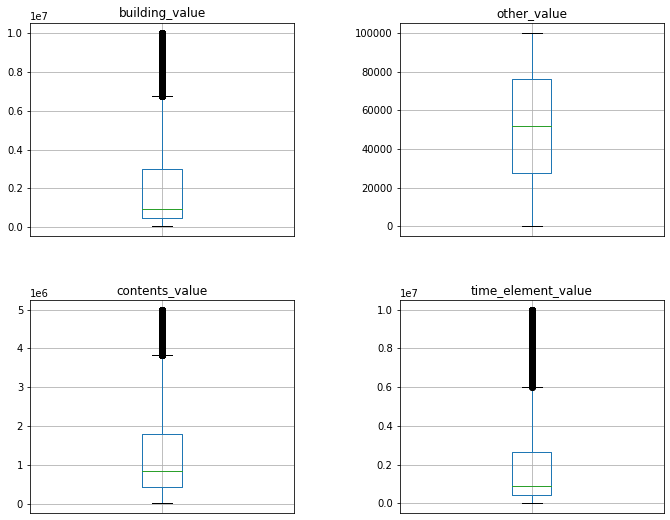

In [99]:
values = ['building_value', 'other_value', 'contents_value', 'time_element_value']
plot_boxes(df_locations[values], rows=2, cols=2)

**occupancy code**

Four codes evenly balanced

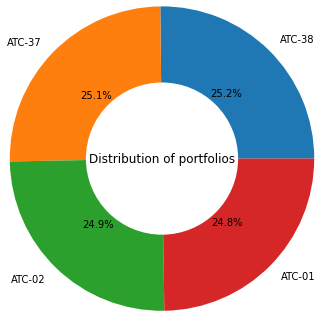

In [100]:
plot_piechart(df_locations, 'occupancy_code')

**construction code**

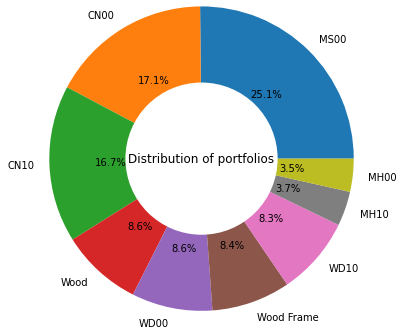

In [101]:
plot_piechart(df_locations, 'construction_code')

**stories**
We have 2 issues:

- Data groups values higuer than 5 with 5+

- Data groups values higuer than 10 with 'Over 10'

KCC has its own way to segment stories as follows:

• Small: Buildings with 1 to 3 stories

• Medium: Buildings with 4 to 7 stories

• Large: Buildings with 8 or more stories

So, we will follow this rule:
5+ will be classified as medium and over 10 as large. 

A new cathegorical feature will be created for each of the clusters. 


In [102]:
# Replacing 5+ and over 10
df_locations['stories'] = df_locations['stories'].replace('5+', '6')
df_locations['stories'] = df_locations['stories'].replace('Over 10', '11')
# Convert to integers
df_locations['stories'] = df_locations['stories'].astype(int)
# Creating new columns
df_locations['stories_small'] = df_locations['stories'].apply(lambda x: 1 if x <= 3 else 0)
df_locations['stories_medium'] = df_locations['stories'].apply(lambda x: 1 if x >= 3 and x < 8 else 0)
df_locations['stories_large'] = df_locations['stories'].apply(lambda x: 1 if x >= 8 else 0)

df_locations.head()


,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,risk_count,stories_small,stories_medium,stories_large
id,,,,,,,,,,,,,,,,,
1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312,1,1,0,0
2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944,1,1,0,0
3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,6,2002.0,11014.10496,1,0,1,0
4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112,1,1,0,0
5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000,1,1,0,0


**year built**

We are substituting the year built variable for the age of the building today, generating variable age

In [103]:
# Generate age
df_locations['age'] = 2022 - df_locations['year_built']
df_locations.head()

,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,risk_count,stories_small,stories_medium,stories_large,age
id,,,,,,,,,,,,,,,,,,
1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312,1,1,0,0,71.0
2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944,1,1,0,0,43.0
3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,6,2002.0,11014.10496,1,0,1,0,20.0
4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112,1,1,0,0,7.0
5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000,1,1,0,0,59.0


**aal**

<AxesSubplot:xlabel='aal'>

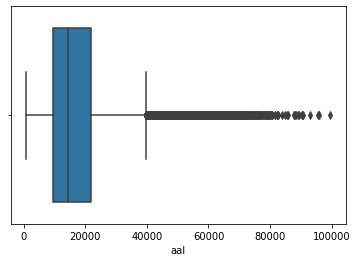

In [104]:
sns.boxplot(df_locations['aal'])

In [105]:
summary_stats(df_locations, '')

,count,mean,std,min,25%,50%,75%,max,Missing vals,# missing,Variable type
aal,49268.0,17461.41,11651.72,773.53,9712.76,14474.73,21749.70,99533.71,False,0,float64
age,49268.0,37.61,20.15,3.00,20.00,38.00,55.00,72.00,False,0,float64
building_value,49268.0,2241552.30,2706162.58,50000.00,470555.25,927804.00,2985167.75,9999611.00,False,0,int64
construction_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
contents_value,49268.0,1330657.45,1257240.06,10131.00,430911.00,841083.00,1787279.25,4999454.00,False,0,int64
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
occupancy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
other_value,49268.0,51249.96,28800.22,0.00,27473.00,51827.00,76056.75,99994.00,False,0,int64
portfolio,49268.0,1.50,0.50,1.00,1.00,2.00,2.00,2.00,False,0,int64
postalcode,49268.0,42265.10,27071.25,501.00,14850.00,45745.00,62675.00,88595.00,False,0,int64


### Predicting missing value of age
We are going to create a simple unsupervised Machine Learning model to cluster locations in age clusters, and we are going to predict the missing value and use the mean value of its cluster.

In [110]:
from sklearn.cluster import KMeans
# Creating variables to use in the model
model_columns = ['portfolio', 'building_value',
       'other_value', 'contents_value', 'time_element_value',
       'aal', 'risk_count', 'stories_small',
       'stories_medium', 'stories_large']

# Dummy dataset to cluster ages
data_kmeans = df_locations[model_columns]

# Creating model and fitting with data
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_kmeans)

# Adding cluster column to dataframe
data_kmeans['cluster'] = np.array(kmeans.labels_)

# Predicting missing value result is cluster 0
kmeans.predict(pd.DataFrame(df_locations.iloc[8343]).transpose()[model_columns])

# Members of cluster 0
c_0 = data_kmeans[data_kmeans['cluster'] == 0].index 

# Calculating avg mean of cluster 0 = 37.6 round to 37
df_locations.iloc[c_0]['age'].mean()

# Adding projected age
df_locations.loc[8343, 'age'] = 37

# Dropping age column
df_locations.drop(columns=['year_built'], inplace=True)


In [112]:
summary_stats(df_locations, '')

,count,mean,std,min,25%,50%,75%,max,Missing vals,# missing,Variable type
aal,49268.0,17461.41,11651.72,773.53,9712.76,14474.73,21749.70,99533.71,False,0,float64
age,49268.0,37.61,20.15,3.00,20.00,38.00,55.00,72.00,False,0,float64
building_value,49268.0,2241552.30,2706162.58,50000.00,470555.25,927804.00,2985167.75,9999611.00,False,0,int64
construction_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
contents_value,49268.0,1330657.45,1257240.06,10131.00,430911.00,841083.00,1787279.25,4999454.00,False,0,int64
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
occupancy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
other_value,49268.0,51249.96,28800.22,0.00,27473.00,51827.00,76056.75,99994.00,False,0,int64
portfolio,49268.0,1.50,0.50,1.00,1.00,2.00,2.00,2.00,False,0,int64
postalcode,49268.0,42265.10,27071.25,501.00,14850.00,45745.00,62675.00,88595.00,False,0,int64


### Exporting clean data to excel

In [113]:
df_locations.to_excel('assets/clean_data.xlsx')

## 2. Tasks